                                                       Airbnb Listing Success Prediction 

In [398]:
pip install pandas



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [399]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [400]:
import pandas as pd

In [401]:
x = pd.read_csv("listings.csv")

C:\Users\Dhinakaran C\AppData\Local\Temp\ipykernel_844\734672491.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("listings.csv")


In [402]:
x.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1,0,1,0,1.21


In [403]:
x.shape

(87946, 75)

In [404]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

I have picked out a few columns after some domain understanding and messing with the data. I have filled up all the null values with appropriate techniques and  have converted their data types to their appropriate ones. Also all the boolean variables are converted to 0's and 1's to maintain uniformity

In [405]:
x['host_is_superhost'].isna().sum()

932

In [406]:
x['host_is_superhost']

0        f
1        f
2        f
3        f
4        t
        ..
87941    t
87942    f
87943    f
87944    f
87945    f
Name: host_is_superhost, Length: 87946, dtype: object

In [407]:
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
superhost_counts = x['host_is_superhost'].value_counts()

C:\Users\Dhinakaran C\AppData\Local\Temp\ipykernel_844\740862470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=superhost_counts.index, y=superhost_counts.values, palette="Set2")
C:\Users\Dhinakaran C\AppData\Local\Temp\ipykernel_844\740862470.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(['False', 'True'])


[Text(0, 0, 'False'), Text(1, 0, 'True')]

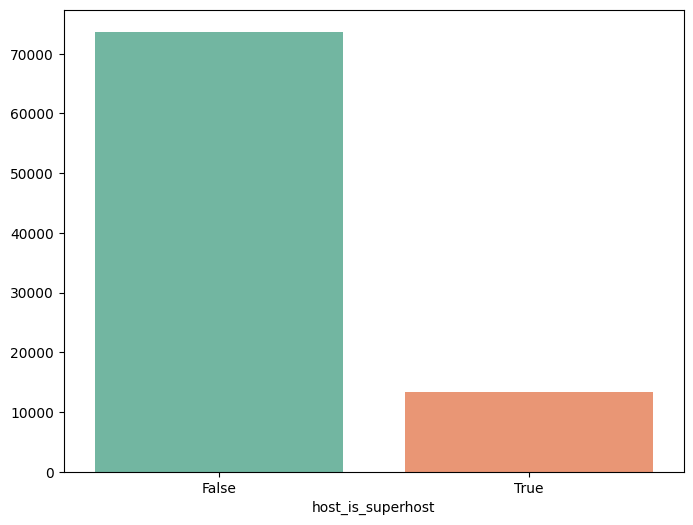

In [409]:
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=superhost_counts.index, y=superhost_counts.values, palette="Set2")
bar_plot.set_xticklabels(['False', 'True'])

A Superhost is a very highly rated host or a very experinced host in AirBnB and the above graph shows us the representation between the number of superhosts and not so super hosts

In [410]:
bool_mapping = {'True': 1, 'False': 0, 't': 1, 'f': 0}
x['host_is_superhost'] = x['host_is_superhost'].map(bool_mapping)

In [411]:
x['host_is_superhost'] = x['host_is_superhost'].fillna(0)

In [412]:
x['host_is_superhost']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
87941    1.0
87942    0.0
87943    0.0
87944    0.0
87945    0.0
Name: host_is_superhost, Length: 87946, dtype: float64

In [413]:
x['host_is_superhost'].isna().sum()

0

In [414]:
x['host_identity_verified']

0        t
1        t
2        t
3        t
4        t
        ..
87941    t
87942    t
87943    t
87944    t
87945    t
Name: host_identity_verified, Length: 87946, dtype: object

In [415]:
x['host_identity_verified'].isna().sum()

5

In [416]:
bool_mapping = {'True': 1, 'False': 0, 't': 1, 'f': 0}
x['host_identity_verified'] = x['host_identity_verified'].map(bool_mapping)

In [417]:
x['host_identity_verified'] = x['host_identity_verified'].fillna(0)

In [418]:
x['host_identity_verified']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
87941    1.0
87942    1.0
87943    1.0
87944    1.0
87945    1.0
Name: host_identity_verified, Length: 87946, dtype: float64

In [419]:
x['host_identity_verified'].isna().sum()

0

In [420]:
hostIdentity_counts = x['host_identity_verified'].value_counts()

C:\Users\Dhinakaran C\AppData\Local\Temp\ipykernel_844\1463566641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=hostIdentity_counts.index, y=hostIdentity_counts.values, palette="Set2")
C:\Users\Dhinakaran C\AppData\Local\Temp\ipykernel_844\1463566641.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(['False', 'True'])


[Text(0, 0, 'False'), Text(1, 0, 'True')]

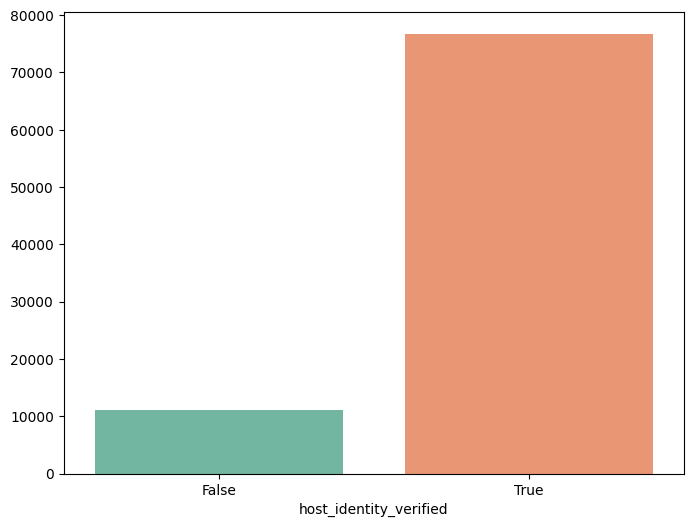

In [421]:
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=hostIdentity_counts.index, y=hostIdentity_counts.values, palette="Set2")
bar_plot.set_xticklabels(['False', 'True'])

In [422]:
x['bathrooms'] = pd.to_numeric(x['bathrooms_text'].str.split(' ').str[0], errors='coerce')  

Over here since the bathrooms column have a lot of null values, i have used the bathroom text column to determine the number of bathrooms in the property

In [423]:
x['bathrooms']

0        1.5
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
87941    1.0
87942    1.0
87943    2.0
87944    1.0
87945    1.0
Name: bathrooms, Length: 87946, dtype: float64

In [424]:
x['bathrooms'].isna().sum()

507

In [425]:
mean_bathrooms = x['bathrooms'].mean()
x['bathrooms'] = x['bathrooms'].fillna(mean_bathrooms)

In [426]:
x['bathrooms'].isna().sum()

0

In [427]:
x['bedrooms'] = x['name'].str.extractall(r'(\d+)\s*bedroom').groupby(level=0).apply(lambda x: ', '.join(x[0]))
x['bedrooms'] = pd.to_numeric(x['bedrooms'])

Again since the bedrooms column had a lot of empty values, i went ahead and got the value i needed from name column which has the exact number of bedrooms available in the property

In [428]:
x['bedrooms']

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
87941    1.0
87942    1.0
87943    1.0
87944    5.0
87945    2.0
Name: bedrooms, Length: 87946, dtype: float64

In [429]:
x['bedrooms'].isna().sum()

3637

In [430]:
mean_of_bedrooms = x['bedrooms'].mean()
x['bedrooms'] = x['bedrooms'].fillna(mean_of_bedrooms)

In [431]:
x['bedrooms'].isna().sum()

0

In [432]:
top_amenities = x['amenities'].str.split(',').explode().str.strip().value_counts().index[:10]
for amenity in top_amenities:
    x[f'has_{amenity.lower().replace(" ", "_")}'] = x['amenities'].apply(lambda x: amenity in x).astype(int)
x['amenities_sum'] = x[[f'has_{amenity.lower().replace(" ", "_")}' for amenity in top_amenities]].sum(axis=1)
x['amenities_sum']

0         5
1         9
2         9
3        10
4         9
         ..
87941     7
87942     9
87943    10
87944     6
87945     9
Name: amenities_sum, Length: 87946, dtype: int64

Over here Im ranking the amenities from 1-10 based on the common use. I have created 10 new columns for each of those amenities and a seperate column for the sum of these amenities.

In [433]:
x['amenities_sum'].describe()

count    87946.000000
mean         7.512098
std          2.158387
min          0.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: amenities_sum, dtype: float64

In [434]:
x["price"].isna().sum()

0

In [435]:
x['price'] = x['price'].str.replace('$', '')

In [436]:
x['price'] = x['price'].str.replace(',', '').astype(float)

Over here I'm trying to remove the dollar symbol from price and convert it to float for easy workflow during predicting

In [437]:
x['price'].describe()

count    87946.000000
mean       181.349817
std        486.174310
min          0.000000
25%         63.000000
50%        110.000000
75%        193.000000
max      80100.000000
Name: price, dtype: float64

In [438]:
x['availability_365'].describe()

count    87946.000000
mean       121.112808
std        134.554102
min          0.000000
25%          0.000000
50%         65.000000
75%        249.000000
max        365.000000
Name: availability_365, dtype: float64

In [439]:
x['number_of_reviews_ltm'].describe()

count    87946.000000
mean         5.797194
std         12.748319
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max        594.000000
Name: number_of_reviews_ltm, dtype: float64

In [440]:
x[['review_scores_rating','review_scores_accuracy',
    'review_scores_cleanliness','review_scores_checkin',
    'review_scores_communication','review_scores_location',
    'review_scores_value']] = x[['review_scores_rating','review_scores_accuracy',
                                  'review_scores_cleanliness','review_scores_checkin',
                                  'review_scores_communication','review_scores_location',
                                  'review_scores_value']].fillna(0)

In [441]:
x['average_review_rating'] = x[['review_scores_rating','review_scores_accuracy',
                                  'review_scores_cleanliness','review_scores_checkin',
                                  'review_scores_communication','review_scores_location',
                                  'review_scores_value']].mean(axis=1)

All the review columns have the ratings for seperate services and I have added those ratings and got an average out of it to make it 1 common column called average review rating

In [442]:
x['average_review_rating']

0        4.680000
1        4.788571
2        4.740000
3        4.844286
4        4.665714
           ...   
87941    0.000000
87942    0.000000
87943    0.000000
87944    0.000000
87945    0.000000
Name: average_review_rating, Length: 87946, dtype: float64

In [443]:
x['instant_bookable']

0        t
1        f
2        f
3        f
4        f
        ..
87941    f
87942    f
87943    f
87944    t
87945    f
Name: instant_bookable, Length: 87946, dtype: object

In [444]:
x['instant_bookable'].isna().sum()

0

In [445]:
bool_mapping = {'True': 1, 'False': 0, 't': 1, 'f': 0}
x['instant_bookable'] = x['instant_bookable'].map(bool_mapping)

In [446]:
x['instant_bookable']

0        1
1        0
2        0
3        0
4        0
        ..
87941    0
87942    0
87943    0
87944    1
87945    0
Name: instant_bookable, Length: 87946, dtype: int64

In [447]:
x['reviews_per_month'].describe()

count    65788.000000
mean         1.014903
std          1.365452
min          0.010000
25%          0.150000
50%          0.540000
75%          1.320000
max         50.250000
Name: reviews_per_month, dtype: float64

In [448]:
x['reviews_per_month'] = x['reviews_per_month'].fillna(0)

Eventhough this is not the right way to fill up the missing ratings, since I'm aware that it could impact the output in various ways, I'm still opting to go with fill it with 0 method since it is a very less percentage of data with null values and the min rating also happens to be 0.

In [449]:
x['reviews_per_month'].describe()

count    87946.000000
mean         0.759198
std          1.260490
min          0.000000
25%          0.000000
50%          0.250000
75%          1.000000
max         50.250000
Name: reviews_per_month, dtype: float64

In [450]:
x.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,"has_""kitchen""","has_""iron""","has_""washer""","has_""essentials""","has_""hair_dryer""","has_""hot_water""","has_""carbon_monoxide_alarm""","has_""dishes_and_silverware""",amenities_sum,average_review_rating
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,1,0,1,1,0,0,0,0,5,4.680000
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,1,1,1,1,1,1,1,1,9,4.788571
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,1,1,0,1,1,1,1,1,9,4.740000
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,1,1,1,1,1,1,1,1,10,4.844286
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,1,1,0,1,1,1,1,1,9,4.665714


After this I have just normalised all the values in the column that I will be using in my model to get a fair consistency throughout the variables used to build the model

In [451]:
max_value_superhost = x['host_is_superhost'].max()
x['host_is_superhost'] = x['host_is_superhost']/ max_value_superhost
x['host_is_superhost']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
87941    1.0
87942    0.0
87943    0.0
87944    0.0
87945    0.0
Name: host_is_superhost, Length: 87946, dtype: float64

In [452]:
max_value_verified = x['host_identity_verified'].max()
x['host_identity_verified'] = x['host_identity_verified']/ max_value_verified
x['host_identity_verified']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
87941    1.0
87942    1.0
87943    1.0
87944    1.0
87945    1.0
Name: host_identity_verified, Length: 87946, dtype: float64

In [453]:
max_value_bathrooms = x['bathrooms'].max()
x['bathrooms'] = x['bathrooms']/ max_value_bathrooms
x['bathrooms']

0        0.031250
1        0.020833
2        0.020833
3        0.020833
4        0.020833
           ...   
87941    0.020833
87942    0.020833
87943    0.041667
87944    0.020833
87945    0.020833
Name: bathrooms, Length: 87946, dtype: float64

In [454]:
max_value_bedrooms = x['bedrooms'].max()
x['bedrooms'] = x['bedrooms']/ max_value_bedrooms
x['bedrooms']

0        0.02
1        0.04
2        0.02
3        0.02
4        0.02
         ... 
87941    0.02
87942    0.02
87943    0.02
87944    0.10
87945    0.04
Name: bedrooms, Length: 87946, dtype: float64

In [455]:
max_value_amenities = x['amenities_sum'].max()
x['amenities_sum'] = x['amenities_sum']/ max_value_amenities
x['amenities_sum']

0        0.5
1        0.9
2        0.9
3        1.0
4        0.9
        ... 
87941    0.7
87942    0.9
87943    1.0
87944    0.6
87945    0.9
Name: amenities_sum, Length: 87946, dtype: float64

In [456]:
max_value_price = x['price'].max()
x['price'] = x['price']/ max_value_price
x['price']

0        0.000524
1        0.002185
2        0.000986
3        0.001873
4        0.000574
           ...   
87941    0.003433
87942    0.001810
87943    0.001998
87944    0.008489
87945    0.002122
Name: price, Length: 87946, dtype: float64

In [457]:
max_value_availability = x['availability_365'].max()
x['availability_365'] = x['availability_365']/ max_value_availability
x['availability_365']

0        0.594521
1        0.109589
2        0.986301
3        0.200000
4        0.536986
           ...   
87941    0.654795
87942    0.241096
87943    0.219178
87944    0.997260
87945    0.813699
Name: availability_365, Length: 87946, dtype: float64

In [458]:
max_value_number_reviews = x['number_of_reviews_ltm'].max()
x['number_of_reviews_ltm'] = x['number_of_reviews_ltm']/ max_value_number_reviews
x['number_of_reviews_ltm']

0        0.015152
1        0.003367
2        0.018519
3        0.008418
4        0.042088
           ...   
87941    0.000000
87942    0.000000
87943    0.000000
87944    0.000000
87945    0.000000
Name: number_of_reviews_ltm, Length: 87946, dtype: float64

In [459]:
max_value_average_reviews = x['average_review_rating'].max()
x['average_review_rating'] = x['average_review_rating']/ max_value_average_reviews
x['average_review_rating']

0        0.936000
1        0.957714
2        0.948000
3        0.968857
4        0.933143
           ...   
87941    0.000000
87942    0.000000
87943    0.000000
87944    0.000000
87945    0.000000
Name: average_review_rating, Length: 87946, dtype: float64

In [460]:
max_value_bookable = x['instant_bookable'].max()
x['instant_bookable'] = x['instant_bookable']/ max_value_bookable
x['instant_bookable']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87941    0.0
87942    0.0
87943    0.0
87944    1.0
87945    0.0
Name: instant_bookable, Length: 87946, dtype: float64

In [461]:
max_value_reviews_per_month = x['reviews_per_month'].max()
x['reviews_per_month'] = x['reviews_per_month']/ max_value_reviews_per_month
x['reviews_per_month']

0        0.028856
1        0.005373
2        0.005174
3        0.011144
4        0.024080
           ...   
87941    0.000000
87942    0.000000
87943    0.000000
87944    0.000000
87945    0.000000
Name: reviews_per_month, Length: 87946, dtype: float64

In [462]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [463]:
from sklearn.model_selection import train_test_split

In [464]:
from sklearn.linear_model import LogisticRegression

In [465]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [466]:
weights = {'host_is_superhost':0.3 , 'host_identity_verified':0.4 , 'amenities_sum':0.8 , 
           'price':0.8 , 'availability_365':0.4 , 'number_of_reviews_ltm':0.7 ,
           'average_review_rating':0.7 , 'instant_bookable':0.4 , 'reviews_per_month':0.8}

x['weighted_sum'] = (x[list(weights.keys())] * pd.Series(weights)).sum(axis=1)
x['weighted_sum']

0        2.127118
1        1.842639
2        2.196012
3        1.974506
4        2.337179
           ...   
87941    1.524664
87942    1.217887
87943    1.289269
87944    1.685696
87945    1.447177
Name: weighted_sum, Length: 87946, dtype: float64

I have given weightage to all the independent variables that I will be using to build the model to get a common value. The weightage is ranged from min 0.1 to max 0.9. With this value I have also formed a new column called weighted_sum which is then used to classify the output either good, bad or average.

In [467]:
x['weighted_sum'].describe()

count    87946.000000
mean         1.748678
std          0.549153
min          0.000180
25%          1.413024
50%          1.821146
75%          2.146855
max          3.817678
Name: weighted_sum, dtype: float64

In [468]:
bins = [-float('inf'), 1.3, 1.95, float('inf')]

In [469]:
finalRating = ['bad', 'average', 'good']

In [470]:
x['classification'] = pd.cut(x['weighted_sum'], bins=bins, labels=finalRating, include_lowest=True)

In [471]:
x['classification']

0           good
1        average
2           good
3           good
4           good
          ...   
87941    average
87942        bad
87943        bad
87944    average
87945    average
Name: classification, Length: 87946, dtype: category
Categories (3, object): ['bad' < 'average' < 'good']

In [472]:
x['classification'].describe()

count       87946
unique          3
top       average
freq        35605
Name: classification, dtype: object

In [473]:
x['classification'].value_counts()

classification
average    35605
good       33804
bad        18537
Name: count, dtype: int64

In [474]:
classification_counts = x['classification'].value_counts()

C:\Users\Dhinakaran C\AppData\Local\Temp\ipykernel_844\1747215647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=classification_counts.index, y=classification_counts.values, palette="Set2")


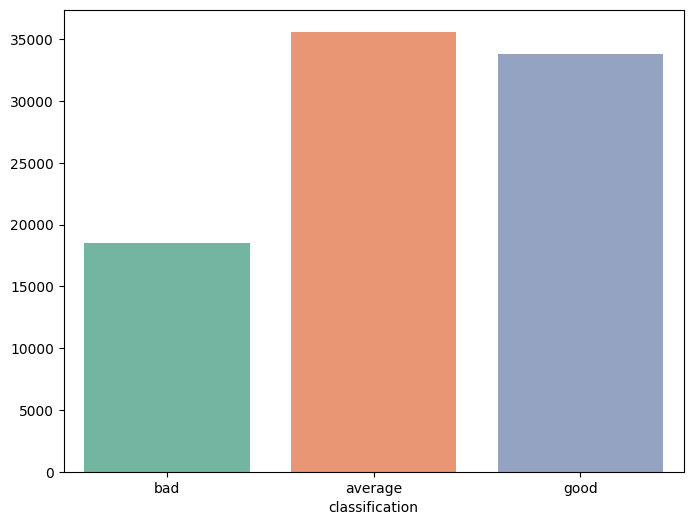

In [475]:
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=classification_counts.index, y=classification_counts.values, palette="Set2")


In [476]:
X = x[['host_is_superhost', 'host_identity_verified', 'amenities_sum' , 
           'price', 'availability_365' , 'number_of_reviews_ltm' ,
           'average_review_rating' , 'instant_bookable' , 'reviews_per_month']]

In [477]:
X

,host_is_superhost,host_identity_verified,amenities_sum,price,availability_365,number_of_reviews_ltm,average_review_rating,instant_bookable,reviews_per_month
0,0.0,1.0,0.5,0.000524,0.594521,0.015152,0.936000,1.0,0.028856
1,0.0,1.0,0.9,0.002185,0.109589,0.003367,0.957714,0.0,0.005373
2,0.0,1.0,0.9,0.000986,0.986301,0.018519,0.948000,0.0,0.005174
3,0.0,1.0,1.0,0.001873,0.200000,0.008418,0.968857,0.0,0.011144
4,1.0,1.0,0.9,0.000574,0.536986,0.042088,0.933143,0.0,0.024080
...,...,...,...,...,...,...,...,...,...
87941,1.0,1.0,0.7,0.003433,0.654795,0.000000,0.000000,0.0,0.000000
87942,0.0,1.0,0.9,0.001810,0.241096,0.000000,0.000000,0.0,0.000000
87943,0.0,1.0,1.0,0.001998,0.219178,0.000000,0.000000,0.0,0.000000
87944,0.0,1.0,0.6,0.008489,0.997260,0.000000,0.000000,1.0,0.000000


In [478]:
y = x['classification']

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [480]:
model = LogisticRegression(multi_class='ovr')

In [481]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [482]:
y_pred = model.predict(X_test)

In [483]:
accuracy = accuracy_score(y_test, y_pred)

In [484]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [485]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[6823  117  128]
 [  26 3797    0]
 [ 124    0 6575]]


In [486]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

     average       0.98      0.97      0.97      7068
         bad       0.97      0.99      0.98      3823
        good       0.98      0.98      0.98      6699

    accuracy                           0.98     17590
   macro avg       0.98      0.98      0.98     17590
weighted avg       0.98      0.98      0.98     17590



In [487]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [488]:
import seaborn as sns

In [489]:
import matplotlib.pyplot as plt

In [490]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

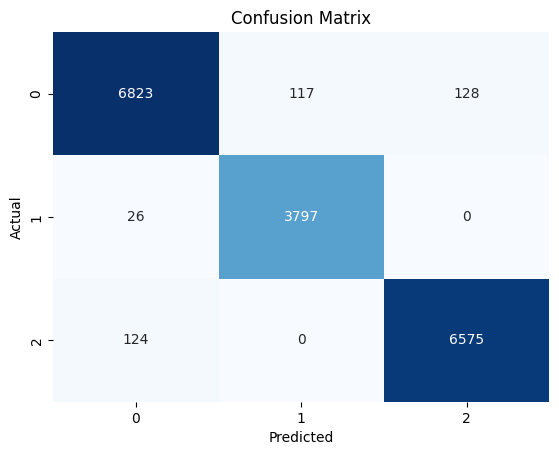

In [491]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Finally with the model been built there are a few takeaways from this logistic regression model

- Domain knowledge is a very vital factor in this problem but we can come to an understanding by just messing with the data
- out of logictic regression and decision tree would be a better option for this data set.
- There are a few outliers in some variables in the data set but since the current accuracy is considerably high and consistent, I did not explore into that path
- I have filled up all the null values with either 0 or average and it has worked fine in the model for me eventhough it might be compromising the authenticity of the data set
- There are specific review ratings given by the user for all the seperate amenities and services provided by the host. Adding those rating to come up with an average is not affecting the model's accuracy in any way. So it is more effective to engineer such columns into 1 column.
- Since there are a large number of amenities provided by individual hosts, we have ranked those amenities from 1-10 in terms of their popularity in BnBs and we have also created a new column summing these amenities to get a number out of 10 to know the number of amenities in a property that comes in the top 10.
  

EFFICIENCY OF THE MODEL:
       The efficiency of the model is considered good with its accuracy being 0.95+ 90% of the times. But we have to keep in mind that the result is totally based on the data we have on hand and no outside data and this could be a bit unreiable when tested with real time data. But since its just a predictive model with limited data, it is a good start and can be used to build further effective models in the future using it as a reference

ALTERNATIVE APPROACH:
             An alternative approach could be using decision trees. But since the regression model has a considerably higher accuracy and is reasonably explainable when looked at it from a domain knowledge perspective and not as just another data set, I opted to just stick with method 1 ie.. logistic regression and also in my model there are 3 predictive outcomes and not 2 so infact that could bring up some complicated algorithms in decision tree and could easily lead to overfitting

IMPROVEMENTS OR RECOMMENDATIONS TO THE MODEL:
            As an improvement to the model, maybe we can try categorizing the variables of a columns into different sections just the way we did for classification column to find some relative response in the model. 
            More input data as in distance from nearest public transport, distance from tourit attractions and certain data columns like that could definitely add some spice to the predictive models.